# Machine Learning for Linear Equation Prediction

---


**Description:** You are tasked with developing a machine learning model that can predict linear
equations based on a given dataset. The dataset consists of pairs of input variables and
corresponding output values, representing different linear equations. Your goal is to train a
model that can accurately predict the coefficients of a linear equation given new input values.

---


**Requirements:**
Dataset Generation:

*   Generate a dataset of multiple linear equations, each represented by a pair of input
variables and the corresponding output value.

*   Ensure that the dataset includes a variety of linear equations with different slopes and
intercepts.
*   You can use a random generator or predefined equations to create the dataset.

---
**Data Pre-processing:**

*   Perform any necessary pre-processing steps on the dataset, such as data normalization or
standardization, to ensure better model performance.



---







In [ ]:
import numpy as np
import pandas as pd



# **Dataset Generation**

In [ ]:
num_students = 1000

hours = np.random.randint(1, 10, size=num_students)
age = np.random.randint(15, 25, size=num_students)
internet = np.random.randint(0, 2, size=num_students)  
# 0: No internet, 1: Internet available

random_noise = np.random.randn(num_students) * 5 
marks = 2 * hours + 3 * age + 5 * internet + random_noise

dataset = pd.DataFrame({'Hours': hours, 'Age': age, 'Internet': internet, 'Marks': marks})

print(dataset.shape)
print(dataset.head())
print(dataset.tail())

(1000, 4)
   Hours  Age  Internet      Marks
0      1   23         0  69.231692
1      9   19         0  73.368139
2      3   21         0  71.583431
3      9   15         0  62.152919
4      9   15         1  67.904190
     Hours  Age  Internet      Marks
995      7   20         0  78.989132
996      4   24         0  76.878283
997      1   19         0  58.127072
998      7   20         0  75.176781
999      9   18         1  79.651017


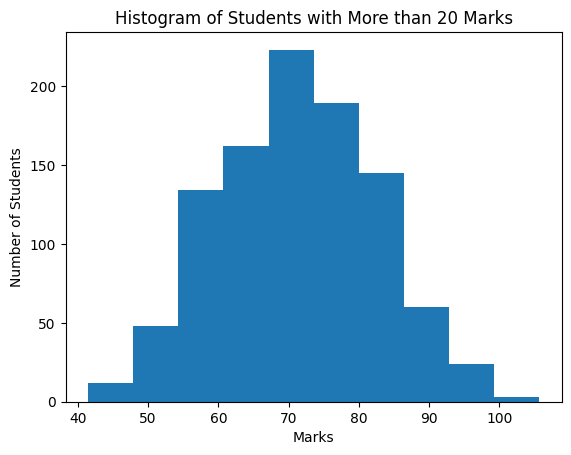

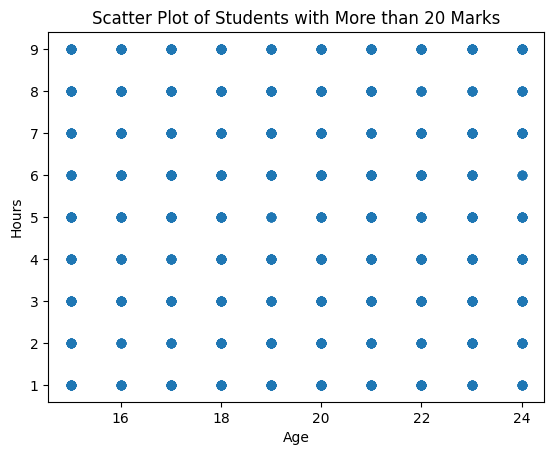

In [ ]:
import matplotlib.pyplot as plt

# Filter the dataset for students with more than 20 marks
filtered_dataset = dataset[dataset['Marks'] > 20]

# Plotting a histogram
plt.hist(filtered_dataset['Marks'], bins=10)
plt.xlabel('Marks')
plt.ylabel('Number of Students')
plt.title('Histogram of Students with More than 20 Marks')
plt.show()

# Plotting a scatter plot
plt.scatter(filtered_dataset['Age'], filtered_dataset['Hours'])
plt.xlabel('Age')
plt.ylabel('Hours')
plt.title('Scatter Plot of Students with More than 20 Marks')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the age groups divisible by 5
age_groups = [15, 20, 25]



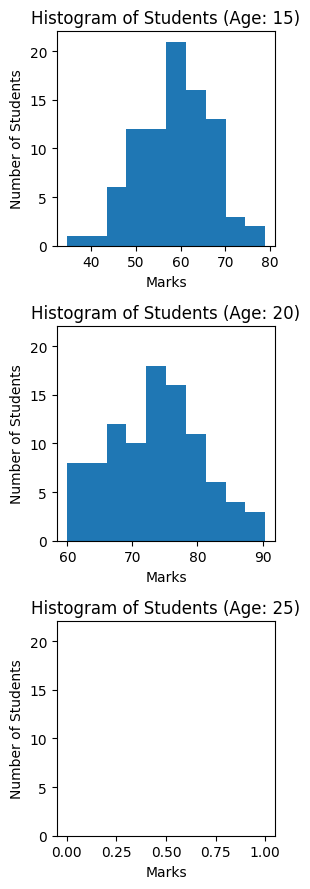

In [28]:
# Create subplots for each age group - histogram
fig, axs = plt.subplots(len(age_groups), 1, figsize=(3, 9), sharey=True, tight_layout=True)

for i, age_group in enumerate(age_groups):
    filtered_dataset = dataset[(dataset['Age'] % 5 == 0) & (dataset['Age'] == age_group)]
    axs[i].hist(filtered_dataset['Marks'], bins=10)
    axs[i].set_xlabel('Marks')
    axs[i].set_ylabel('Number of Students')
    axs[i].set_title(f'Histogram of Students (Age: {age_group})')

plt.show()


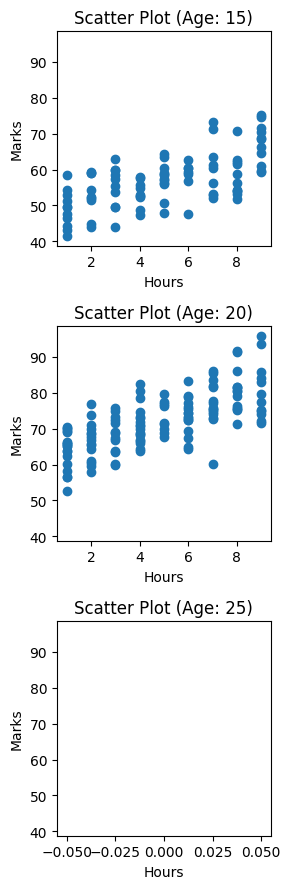

In [ ]:
# Create subplots for each age group - scatterplot

fig, axs = plt.subplots(len(age_groups), 1, figsize=(3, 9), sharey=True, tight_layout=True)

for i, age_group in enumerate(age_groups):
    filtered_dataset = dataset[dataset['Age'] % 5 == 0]
    filtered_dataset_age_group = filtered_dataset[filtered_dataset['Age'] == age_group]
    axs[i].scatter(filtered_dataset_age_group['Hours'], filtered_dataset_age_group['Marks'])
    axs[i].set_xlabel('Hours')
    axs[i].set_ylabel('Marks')
    axs[i].set_title(f'Scatter Plot (Age: {age_group})')

plt.show()

# **Data Pre-processing**

In [ ]:
#segrate dataset into input x and output y
# input as expect last column remaining coloumns are outputs
X = dataset.iloc[:,:-1].values
print(X.shape)
X

(1000, 3)


array([[ 5, 18,  1],
       [ 2, 19,  0],
       [ 9, 22,  0],
       ...,
       [ 1, 16,  1],
       [ 5, 16,  0],
       [ 7, 21,  1]])

In [ ]:
#segrate dataset into input x and output y
Y = dataset.iloc[:,-1].values
Y

array([ 72.8844536 ,  69.26317884,  79.92800053,  73.78723392,
        81.44132423,  72.16484787,  99.19846134,  59.39458477,
        75.80101778,  47.7245532 ,  80.47231874,  63.59134895,
        70.67055792,  71.2802248 ,  74.25081209,  59.8319763 ,
        70.35970744,  64.28837682,  75.81716404,  58.86949892,
        58.63050519,  57.60891035,  83.33719927,  75.198664  ,
        58.62743341,  61.0894007 ,  62.92395131,  74.84797073,
        63.58955398,  72.43183903,  69.73093006,  66.36920801,
        61.95323969,  58.17021833,  61.07337585,  64.13327779,
        65.96856668,  80.74052974,  68.80042552,  71.50989927,
        76.35010608,  78.46183471,  49.56459812,  69.14601509,
        73.88548358,  56.4187685 ,  78.99732861,  57.31352576,
        89.53251897,  83.06806894,  65.86225151,  62.74193154,
        83.15385365,  74.12890289,  62.45173848,  73.2189594 ,
        72.06147369,  70.41308471,  77.59803612,  60.07384568,
        70.04515036,  80.01549126,  58.04254361,  88.18

# **Representing linear equations.**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#training the data set using LR
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

#*OUTPUT *

In [ ]:
#predict 
a=[[9,20,1]]
PredictemodelResult = model.predict(a)
print(PredictemodelResult)

[83.022809]


# **(or) Giving data through User**

# **OUTPUT **

In [ ]:
#predict 

hours = int(input("enter hours  : "))
age = int(input("enter  age : "))
internet = int(input("enter internet is available or not (0/1)  : "))
a=[[hours,age,internet]]
#a=[[9,20,1]]
PredictemodelResult = model.predict(a)
print(PredictemodelResult)

enter hours  : 9
enter  age : 6
enter internet is available or not (0/1)  : 1
[41.4575111]


AKULA ZAHEER SHA

---


a.zaheersha@gmail.com

---


9494333702